In [1]:
import pandas as pd
import scipy

import netpixi
import graph_tool_extras as gte

import distribution as dst
from graph_tool import centrality, clustering

import matplotlib.pyplot as plt
import seaborn as sns

import time

In [2]:
g = gte.load('./rede.net.gz')

# Descrição da Rede
Obtendo o tamanho da rede (número de vérticies e arestas).

In [3]:
print(f'Número de Verticies: {g.num_vertices()}')
print(f'Número de Arestas: {g.num_edges()}')

Número de Verticies: 28328
Número de Arestas: 481022


Obtendo a densidade da rede por meio da função `density`.

In [4]:
print(f'Densidade: {g.density()}%')

Densidade: 0.119889%


Obentendo a transitividade da rede por meio da função `transitivity`.

In [5]:
print(f'Transitividade: {g.transitivity()}%')

Transitividade: 3.939872%


Obtendo o número total de vizinhos de cada um dos vérticies por meio da função `get_total_degrees`.  

In [6]:
degrees = g.get_total_degrees()

In [7]:
degrees.describe()

count    28328.000000
mean        33.960887
std         46.824864
min          1.000000
25%          5.000000
50%         16.000000
75%         43.000000
max        586.000000
dtype: float64

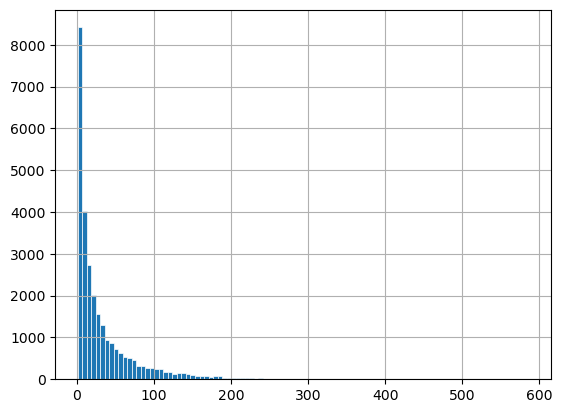

In [8]:
degrees.hist(bins=100, edgecolor='white', linewidth=0.5);

Analizando a **normalidade** da destribuição dos `degree` através da função `not_normal`.

In [9]:
p_value = dst.not_normal(degrees)
print(f'Not Normal: {'<0.001' if p_value < 0.001 else float(p_value)}')

Not Normal: <0.001


Analizando se a destribuição dos `degree` é mais **power law** do que **lognormal** através da função `more_powerlaw_than_lognormal`.

In [10]:
powerlaw, p_value = dst.more_powerlaw_than_lognormal(degrees)
print(f'More Powerlaw than Lognormal: {'{float(p_value)} (Inconclusivo)' if 0.05 < p_value < 0.1 else ('<0.001' if  p_value < 0.001 else float(p_value))} {'[powerlaw]' if powerlaw else ''}')

More Powerlaw than Lognormal: 0.003931460834995414 


Calculating best minimal value for power law fit
/opt/miniconda/envs/jupyterlab/lib/python3.12/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


Analizando se a destribuição dos `degree` é mais **power law** do que **exponential** através da função `more_powerlaw_than_exponential`.

In [11]:
powerlaw, p_value = dst.more_powerlaw_than_exponential(degrees)
print(f'More Powerlaw than Exponential: {f'{float(p_value)} (Inconclusivo)' if 0.05 < p_value < 0.1 else ('<0.001' if  p_value < 0.001 else float(p_value))} {'[powerlaw]' if powerlaw else ''}')

More Powerlaw than Exponential: 0.04929347630098166 


Calculating best minimal value for power law fit


## Distâncias

Obtendo as distâncias entre cada vérticie da rede por meio da função `get_distances`.

**OBS.:** Essas funçãoes estão comentadas pois, mesmoq eu a `get_distances` consiga rodar, o kernel tende a crashar sem conseguir rodar o `discribe` ou o `hist`, impossibilitando continuar executando o resto do notebook.

In [12]:
g.describe_distances()

count    8.024756e+08
mean     3.285072e+00
std      6.436154e-01
min      0.000000e+00
max      7.000000e+00
dtype: float64

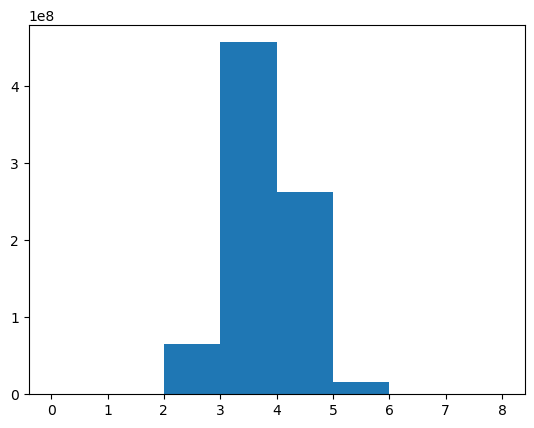

In [13]:
g.hist_distances()

# Métricas da Rede

## Closeness
Primeiro, calculamos a centralidade _closeness_ com `closeness`.

In [14]:
c = centrality.closeness(g, harmonic=True)
g.add_vp('closeness', c)

Depois, adicionamos a propriedade de vértice ao grafo com `add_vp`.

## Betweeness
Agora, para calcularmos o _betweeness_, utilizamos a função `betweenness`.

In [15]:
b, _ = centrality.betweenness(g)
g.add_vp('betweenness', b)

## Degrees
Para calcular a centralidade _degree_, utilizamos a função `total_degree`.

In [16]:
d = gte.total_degree(g)
g.add_vp('degree', d)

## Clustering Coeficient
Agora, para calcularmos o clustering, utilizamos a função `local_clustering`

In [17]:
cc = clustering.local_clustering(g)
g.add_vp('clustering', cc)

## Visualização da Rede
Agora com todas as 3 métricas calculadas podemos salvar e visualiza-las na rede.

In [18]:
gte.save(g, 'rede_metricas.net.gz')

In [19]:
# r = netpixi.render('rede_metricas.net.gz', infinite=True)

Primeiro, mas não menos importante, a visualização padrão da rede, sem a aplicação de nenhuma métrica

In [20]:
#time.sleep(5)
# r.vertex_default(size=4, bwidth=1)
# r.edge_default(width=1)

**OBS.:** Descomente as mudanças de escala para ver o resultado de cada métrica.

In [21]:
# r.vertex_scale('closeness', 10, 30)
# r.vertex_scale('betweenness', 10, 30)
# r.vertex_scale('degree', 10, 30)